# RNN(Recurrent Neural Network)
- 은닉층에서 나온 결과값이 다시 은닉층으로 돌아가 새로운 입력값과 연산을 수행하는 순환구조.


![이미지](https://github.com/Kim-Geunyoung/DailyStudy/blob/master/Images/RNN_%EC%88%9C%ED%99%98%EA%B5%AC%EC%A1%B0.png?raw=true)

위 이미지는 RNN의 기본적인 순환구조이다.  
-> 설명 추가

## 실습

### 주가 데이터 불러오기

In [ ]:
!pip install yfinance

In [4]:
# 삼성전자 주가 정보 가져오기
import yfinance as yf
df = yf.download('005930.KS', '2022-01-01', '2022-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,76808.164062,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,75539.421875,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,75051.445312,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,76417.789062,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,76125.000000,9947422


### 라이브러리 불러오기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model

### Sequence 데이터 구조로 만들기


In [6]:
# df의 값을 numpy array로 만들기
df = df.values

In [7]:
df.shape

(244, 6)

In [8]:
len(df)

244

In [11]:
# 종가 예측하기

# 한번에 고려할 기간 설정(일주일)
timestep = 7

# x의 데이터 구조를 3차원으로 변경하기 -> [데이터 수, 한번에 고려할 시점 수, 시점별 feature 수]
x = []
y = []

for i in range(len(df)-timestep): 
    x.append(df[i:i+timestep, :])
    y.append(df[i+timestep, -3])

x = np.array(x)
y = np.array(y)

# train, val, test 나누기
x_train, x_val, x_test = x[:154], x[154:199], x[199:]
y_train, y_val, y_test = y[:154], y[154:199], y[199:]

# shape 찍어보기
print(f'x: {x.shape}, y: {y.shape}')
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_val: {x_val.shape}, y_val: {y_val.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x: (237, 7, 6), y: (237,)
x_train: (154, 7, 6), y_train: (154,)
x_val: (45, 7, 6), y_val: (45,)
x_test: (38, 7, 6), y_test: (38,)


## RNN 모델링

In [13]:
from tensorflow.keras import *
from tensorflow.keras.layers import *

In [27]:
# 세션 클리어
backend.clear_session()

# model 선언
model = keras.models.Sequential()

# 레이어 쌓기
model.add(Input(shape=(7,6)))
model.add(SimpleRNN(32, return_sequences=False, activation='tanh'))
model.add(Dense(1, activation = 'linear'))

# model compile
model.compile(loss = 'mse', optimizer='adam')

# model 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1248      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [28]:
# model 학습
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 2s 101ms/step - loss: 4422395904.0000 - val_loss: 3208825344.0000
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 4422375424.0000 - val_loss: 3208806656.0000
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 4422355456.0000 - val_loss: 3208788224.0000
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 4422335488.0000 - val_loss: 3208769280.0000
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 4422315008.0000 - val_loss: 3208750592.0000
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 4422295040.0000 - val_loss: 3208732416.0000
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 4422274560.0000 - val_loss: 3208713984.0000
Epoch 8/100
5/5 [==============================] - 0s 24ms/step - loss: 4422254592.0000 - val_loss: 3208695040.0000
Epoch 9/100
5/5 [==============================] - 0s 16ms/step - loss:

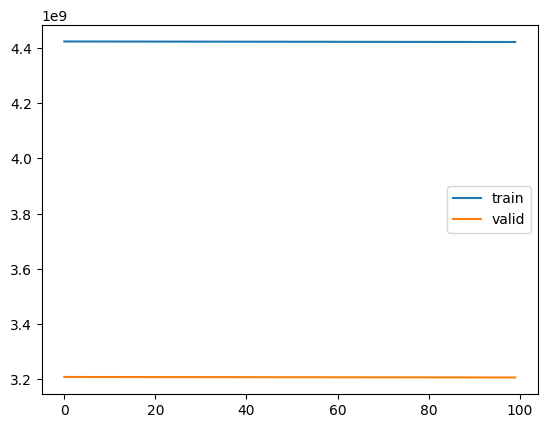

In [29]:
# model 학습 곡선
plt.plot(hist.history["loss"], label = 'train')
plt.plot(hist.history["val_loss"], label = 'valid')
plt.legend()
plt.show()

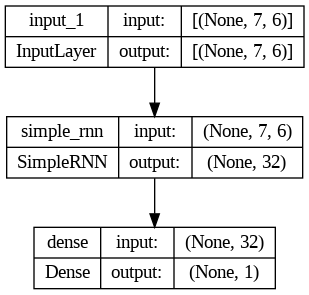

In [30]:
plot_model(model, show_shapes=True)